In [6]:
!pip install spacy
!python -m spacy download de_core_news_lg
!pip install pandas
!pip install wordcloud matplotlib
!pip install transformers
!pip install scikit-learn
!pip install bertviz
!pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 567.8/567.8 MB 1.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [34]:
import spacy
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from transformers import AutoTokenizer
import torch
from bertviz import model_view, head_view

from collections import defaultdict
import numpy as np
import pandas as pd
from transformers import BertTokenizer, BertForMaskedLM


In [33]:
nlp = spacy.load("de_core_news_lg")

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-german-cased')
model_masked_lm = BertForMaskedLM.from_pretrained('bert-base-german-cased')


Some weights of the model checkpoint at bert-base-german-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [9]:
text = "Ich will gerne mehr über NLP erfahren, weil es ein superspannendes Feld ist."

doc = nlp(text)

# **Tokenisierung**

In [10]:
for w in doc:
  print(w.text)

Ich
will
gerne
mehr
über
NLP
erfahren
,
weil
es
ein
superspannendes
Feld
ist
.


# **Lemmatisierung**

In [11]:
for w in doc:
  print(w.text,': ',w.lemma_)

Ich :  ich
will :  wollen
gerne :  gerne
mehr :  mehr
über :  über
NLP :  NLP
erfahren :  erfahren
, :  --
weil :  weil
es :  es
ein :  ein
superspannendes :  superspannend
Feld :  Feld
ist :  sein
. :  --


# **Part-of-Speech Tagging**

In [12]:
for w in doc:
  print(w.text,': ',w.pos_,': ',spacy.explain(w.pos_))

Ich :  PRON :  pronoun
will :  AUX :  auxiliary
gerne :  ADV :  adverb
mehr :  PRON :  pronoun
über :  ADP :  adposition
NLP :  PROPN :  proper noun
erfahren :  VERB :  verb
, :  PUNCT :  punctuation
weil :  SCONJ :  subordinating conjunction
es :  PRON :  pronoun
ein :  DET :  determiner
superspannendes :  ADJ :  adjective
Feld :  NOUN :  noun
ist :  AUX :  auxiliary
. :  PUNCT :  punctuation


In [13]:

sentence_analyzed = []
for w in doc:
  sentence_analyzed.append({"Token": w.text, "Lemma": w.lemma_, "Part of Speech": w.pos_})
pd.DataFrame(sentence_analyzed)

,Token,Lemma,Part of Speech
0,Ich,ich,PRON
1,will,wollen,AUX
2,gerne,gerne,ADV
3,mehr,mehr,PRON
4,über,über,ADP
5,NLP,NLP,PROPN
6,erfahren,erfahren,VERB
7,",",--,PUNCT
8,weil,weil,SCONJ
9,es,es,PRON


In [14]:
# Display dependency tree in Jupyter or web browser
spacy.displacy.render(doc, style="dep", jupyter=True, options={"compact": True, "bg": "#fafafa"})

In [15]:
sample_story = """Ein märchenhaftes Abenteuer in fünf Kapiteln


Es war einmal ein kleiner Junge namens Emil, der mit seinen Eltern in einem abgeschiedenen Dorf namens Tannengrund lebte. Das Dorf war umgeben von weiten Wiesen und dichten Wäldern – besonders auffällig war der Flüsterwald, der sich wie ein grüner Ozean bis zum Horizont erstreckte. Niemand wagte sich tief hinein. Alte Geschichten erzählten von wandernden Bäumen, sprechenden Tieren und vergessenen Pfaden, die sich bewegten wie Lebewesen.

Emils Großvater, ein ehemaliger Förster, war der Einzige, der je in das Innere vorgedrungen war. Abends erzählte er Emil Geschichten vom „Herz des Waldes“, einem geheimen Ort, an dem Zeit und Raum keine Rolle spielten. Emil hörte gebannt zu, mit großen Augen und voller Sehnsucht, selbst eines Tages das Herz des Waldes zu finden.


Eines Morgens, als der Nebel wie ein silbernes Band über den Feldern lag, sah Emil am Waldrand ein Reh. Doch dieses Reh war anders: Es hatte ein weißes Fell und Augen, die wie kleine Monde leuchteten. Es wirkte verletzt – sein Vorderlauf zitterte. Ohne nachzudenken, rannte Emil los, um zu helfen.

Das Reh verschwand tiefer in den Wald, doch Emil folgte – über Moos, unter tief hängenden Ästen hindurch, vorbei an flüsternden Farnen und rauschenden Bächen. Erst als er durch ein dichtes Geäst trat und auf eine kleine Lichtung kam, wurde ihm bewusst: Er war allein.

Das Reh war verschwunden. Der Weg zurück? Nicht mehr zu erkennen.

Er drehte sich mehrmals im Kreis, rief nach seinen Eltern, doch nur das Echo antwortete. Der Flüsterwald hatte ihn aufgenommen.


Nach Stunden des Wanderns und Tränen der Verzweiflung, begegnete Emil einer Gestalt aus Moos und Holz – dem Waldhüter, einem uralten Wesen mit Augen so alt wie die Eichen selbst.

„Du bist ein Suchender“, sprach der Waldhüter mit einer Stimme, die wie Wind in den Blättern klang. „Doch wer den Weg hinaus sucht, muss erst den Weg nach innen finden.“

Der Waldhüter erklärte Emil, dass er drei Prüfungen bestehen müsse:

1. Die Prüfung des Mutes
Ein dunkler Tunnel führte unter eine alte Eiche. Dort wohnte die Angstspinnerin, eine riesige Spinne aus Nebel, die Emil seine schlimmsten Ängste zeigte: Verlassenwerden, Dunkelheit, Einsamkeit. Doch Emil schloss die Augen und sagte: „Ich habe keine Angst vor dem, was ich verstehe.“ Die Spinne verschwand.

2. Die Prüfung des Herzens
Ein verletzter Wolf blockierte den Pfad. Emil hatte Angst, doch er erinnerte sich an das Reh und versorgte die Wunde des Wolfs mit Moos und Wasser. Der Wolf verwandelte sich in einen Wächter des Waldes und verneigte sich.

3. Die Prüfung der Erinnerung
Ein Spiegelbaum zeigte Emil Bilder aus seiner Vergangenheit – seine Familie, sein Großvater, seine eigenen Fehler. „Vergiss nie, wer du bist“, flüsterte der Baum. Emil nickte – er war bereit.


Als Emil die letzte Prüfung bestand, öffnete sich vor ihm ein versteckter Pfad aus Licht und Gesang. Vögel, die Worte zwitscherten, begleiteten ihn. Am Ende stand ein Kristallsee mit einem Baum, dessen Wurzeln in die Sterne wuchsen.

Dort wartete das weiße Reh – nun mit Geweih aus Licht. Es sprach:

„Du hast dein Herz gefunden. Nun darfst du sehen, wie der Wald wirklich ist.“

Emil sah Szenen, die kein Mensch je gesehen hatte: Die Geburt eines Baumes, das Flüstern der ersten Winde, verlorene Erinnerungen der Erde.

Das Reh schenkte ihm eine Flöte aus Waldkristall. „Wenn du je wieder deinen Weg verlieren solltest – spiele diese Melodie.“


Als Emil am nächsten Morgen die Augen öffnete, lag er am Waldrand, die Flöte in der Hand. Die Sonne ging gerade auf. Er lief zurück ins Dorf, wo seine Eltern weinten vor Freude, als sie ihn sahen.

Emil sprach nie laut über das, was er gesehen hatte. Doch oft ging er wieder an den Waldrand, spielte die Flöte und lächelte, wenn der Wind ihm Geschichten erzählte.

Er wusste: Der Flüsterwald hatte ihn geprüft, gereinigt – und verwandelt.


Emil wurde später selbst ein Hüter des Waldes. Er schrieb Gedichte, lehrte Kinder das Hören der Natur und führte Wanderer sicher an den Rand des Flüsterwaldes – doch nie darüber hinaus.

Denn das Herz des Waldes ist nicht zum Sehen da.
Sondern zum Verstehen."""

In [16]:
doc = nlp(sample_story)

tokens = []
tokens_lower_case = []
lemmas = []
lemmas_lower_case = []
lemmas_lower_case_nouns_only = []

for w in doc:
  tokens.append(w.text)
  tokens_lower_case.append(w.text.lower())
  lemmas.append(w.lemma_)
  lemmas_lower_case.append(w.lemma_.lower())
  if w.pos_ in ["NOUN", "PROPN"]:
    lemmas_lower_case_nouns_only.append(w.lemma_.lower())

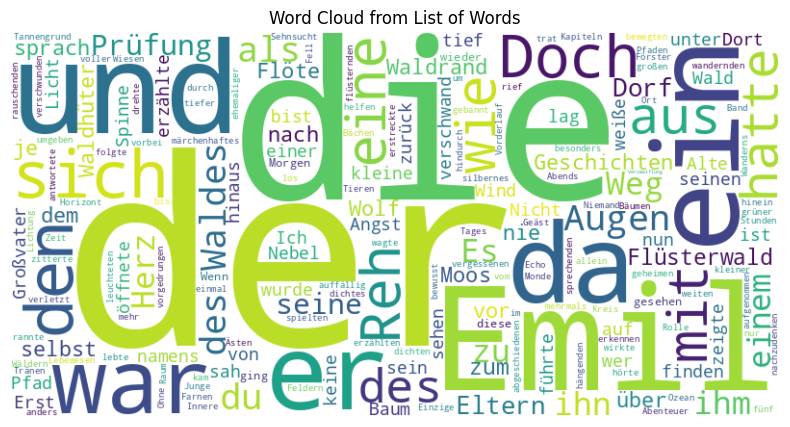

In [17]:
# Wir schaffen eine Wortwolke nur auf Grundlage der nicht-normalisierten Tokens
# Join the words into a single string
story = ' '.join(tokens)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(story)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud from List of Words")
plt.show()

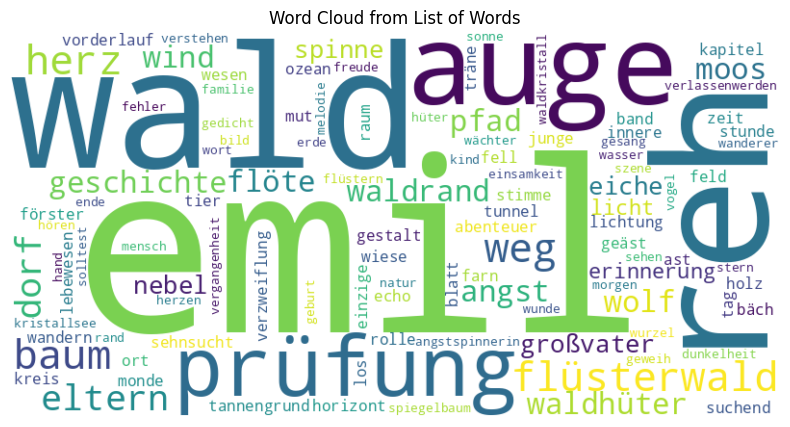

In [18]:
# Wir schaffen eine Wortwolke nur auf Grundlage der nicht-normalisierten Tokens
# Join the words into a single string
story = ' '.join(lemmas_lower_case_nouns_only)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(story)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud from List of Words")
plt.show()

In [19]:
tokenizer = AutoTokenizer.from_pretrained("dbmdz/bert-base-german-cased")

In [20]:
for token in tokenizer.tokenize(text):
  print(token)

Ich
will
gerne
mehr
über
NL
##P
erfahren
,
weil
es
ein
super
##spanne
##nde
##s
Feld
ist
.


In [21]:
for token in doc:
  print(token.text)

Ein
märchenhaftes
Abenteuer
in
fünf
Kapiteln




Es
war
einmal
ein
kleiner
Junge
namens
Emil
,
der
mit
seinen
Eltern
in
einem
abgeschiedenen
Dorf
namens
Tannengrund
lebte
.
Das
Dorf
war
umgeben
von
weiten
Wiesen
und
dichten
Wäldern
–
besonders
auffällig
war
der
Flüsterwald
,
der
sich
wie
ein
grüner
Ozean
bis
zum
Horizont
erstreckte
.
Niemand
wagte
sich
tief
hinein
.
Alte
Geschichten
erzählten
von
wandernden
Bäumen
,
sprechenden
Tieren
und
vergessenen
Pfaden
,
die
sich
bewegten
wie
Lebewesen
.



Emils
Großvater
,
ein
ehemaliger
Förster
,
war
der
Einzige
,
der
je
in
das
Innere
vorgedrungen
war
.
Abends
erzählte
er
Emil
Geschichten
vom
„
Herz
des
Waldes
“
,
einem
geheimen
Ort
,
an
dem
Zeit
und
Raum
keine
Rolle
spielten
.
Emil
hörte
gebannt
zu
,
mit
großen
Augen
und
voller
Sehnsucht
,
selbst
eines
Tages
das
Herz
des
Waldes
zu
finden
.




Eines
Morgens
,
als
der
Nebel
wie
ein
silbernes
Band
über
den
Feldern
lag
,
sah
Emil
am
Waldrand
ein
Reh
.
Doch
dieses
Reh
war
anders
:
Es
hatte
ein
wei

In [22]:
print([token for token in tokenizer.tokenize(text)])

['Ich', 'will', 'gerne', 'mehr', 'über', 'NL', '##P', 'erfahren', ',', 'weil', 'es', 'ein', 'super', '##spanne', '##nde', '##s', 'Feld', 'ist', '.']


In [23]:
# Sparse vector for words

# Einfaches Korpus
corpus = [
    "die Katze sitzt auf der Matte",
    "der Hund liegt auf dem Teppich",
    "die Katze und der Hund sind Freunde"
]

# Vorverarbeitung
tokens = [[w.lemma_ for w in nlp(sentence)] for sentence in corpus]
window_size = 3

# Kookkurrenzmatrix berechnen
cooc_matrix = defaultdict(lambda: defaultdict(int))

for sentence in tokens:
    for i, word in enumerate(sentence):
        for j in range(max(0, i - window_size), min(len(sentence), i + window_size + 1)):
            if i != j:
                cooc_matrix[word][sentence[j]] += 1

# In DataFrame umwandeln
vocab = sorted(cooc_matrix.keys())
df = pd.DataFrame(index=vocab, columns=vocab).fillna(0)

for word in vocab:
    for context_word in cooc_matrix[word]:
        df.loc[word, context_word] = cooc_matrix[word][context_word]

df["Katze"].tolist()


<ipython-input-23-181e5d712fce>:25: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = pd.DataFrame(index=vocab, columns=vocab).fillna(0)


[0, 1, 0, 0, 0, 1, 4, 0, 0, 1, 1]

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Beispieltext
korpus = [
    "die Katze sitzt auf der Matte",
    "der Hund liegt auf dem Teppich",
    "die Katze und der Hund sind Freunde"
]

# CountVectorizer erzeugt eine Term-Dokumenten-Matrix
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(korpus)

# In DataFrame umwandeln zur besseren Ansicht
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
df


,auf,dem,der,die,freunde,hund,katze,liegt,matte,sind,sitzt,teppich,und
0,1,0,1,1,0,0,1,0,1,0,1,0,0
1,1,1,1,0,0,1,0,1,0,0,0,1,0
2,0,0,1,1,1,1,1,0,0,1,0,0,1


In [25]:
# Define your words
word1 = nlp("König")
word2 = nlp("Königin")
word3 = nlp("Mann")
word4 = nlp("Frau")

# Compute similarity
print(f"Ähnlichkeit (König vs Königin): {word1.similarity(word2):.4f}")
print(f"Ähnlichkeit (Mann vs Frau): {word3.similarity(word4):.4f}")
print(f"Ähnlichkeit (König vs Mann): {word1.similarity(word3):.4f}")
print(f"Ähnlichkeit (König vs Frau): {word1.similarity(word4):.4f}")
print(f"Ähnlichkeit (Königin vs Frau): {word2.similarity(word4):.4f}")

Ähnlichkeit (König vs Königin): 0.7749
Ähnlichkeit (Mann vs Frau): 0.6504
Ähnlichkeit (König vs Mann): 0.4244
Ähnlichkeit (König vs Frau): 0.2528
Ähnlichkeit (Königin vs Frau): 0.4270


In [26]:
print(word1.vector.shape)

(300,)


In [27]:
# Compute analogy: king - man + woman ≈ ?
analogy_vector = nlp("König").vector - nlp("Mann").vector + nlp("Frau").vector
# analogy_vector = nlp("Kanzler").vector - nlp("Mann").vector + nlp("Frau").vector
# analogy_vector = nlp("Auto").vector + nlp("Straße").vector + nlp("Frau").vector
# analogy_vector = nlp("Steak").vector - nlp("USA").vector + nlp("Deutschland").vector


# Find the most similar words
similarities = []
for word in nlp.vocab:
    if word.has_vector and word.is_lower and word.is_alpha:
        similarity = nlp.vocab.vectors.most_similar(analogy_vector.reshape(1, -1), n=1)[0][0]
        best_word = nlp.vocab.strings[similarity]
        break

print("Most similar word:", best_word)

Most similar word: Königin


<ipython-input-27-e6260dbdb6f7>:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  best_word = nlp.vocab.strings[similarity]


In [28]:
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.metrics.pairwise import cosine_similarity

# Modell laden (z.B. deutsches BERT-Modell)
model_name = "bert-base-german-cased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Zwei Kontexte für das Wort "Bank"
sentence1 = "Er setzte sich auf die Bank im Park."
sentence2 = "Die Bank hat den Kredit genehmigt."

sentence3 = "Ich sitze auf der Bank."
sentence4 = "ich hebe in der Bank Geld ab."

# Tokenisierung + Tensor-Erstellung
inputs1 = tokenizer(sentence1, return_tensors="pt")
inputs2 = tokenizer(sentence2, return_tensors="pt")

inputs3 = tokenizer(sentence3, return_tensors="pt")
inputs4 = tokenizer(sentence4, return_tensors="pt")

# Modellvorhersage (Kontextuelle Token-Embeddings)
with torch.no_grad():
    outputs1 = model(**inputs1)
    outputs2 = model(**inputs2)

    outputs3 = model(**inputs3)
    outputs4 = model(**inputs4)

# Token-Index von "Bank" finden
token_bank1 = tokenizer.convert_ids_to_tokens(inputs1["input_ids"][0])
token_bank2 = tokenizer.convert_ids_to_tokens(inputs2["input_ids"][0])
index_bank1 = token_bank1.index("Bank")
index_bank2 = token_bank2.index("Bank")

token_bank3 = tokenizer.convert_ids_to_tokens(inputs3["input_ids"][0])
token_bank4 = tokenizer.convert_ids_to_tokens(inputs4["input_ids"][0])
index_bank3 = token_bank3.index("Bank")
index_bank4 = token_bank4.index("Bank")

# Kontextuelles Embedding extrahieren
embedding_bank1 = outputs1.last_hidden_state[0][index_bank1]
embedding_bank2 = outputs2.last_hidden_state[0][index_bank2]

embedding_bank3 = outputs3.last_hidden_state[0][index_bank1]
embedding_bank4 = outputs4.last_hidden_state[0][index_bank2]

# Ähnlichkeit berechnen
cos_sim_1_2 = cosine_similarity(
    embedding_bank1.unsqueeze(0).numpy(),
    embedding_bank2.unsqueeze(0).numpy()
)

# Ähnlichkeit berechnen
cos_sim_1_3 = cosine_similarity(
    embedding_bank1.unsqueeze(0).numpy(),
    embedding_bank3.unsqueeze(0).numpy()
)

print(f"Kosinussimilarität zwischen den Bedeutungen von 'Bank': {cos_sim_1_2[0][0]:.4f}")
print(f"Kosinussimilarität zwischen den Bedeutungen von 'Bank': {cos_sim_1_3[0][0]:.4f}")


Kosinussimilarität zwischen den Bedeutungen von 'Bank': 0.6826
Kosinussimilarität zwischen den Bedeutungen von 'Bank': 0.8762


In [30]:

# Define a sample input sentence
sentence = "Ich will gerne mehr über NLP erfahren, weil es ein superspannendes Feld ist."

# Tokenize the input sentence
inputs = tokenizer(sentence, return_tensors='pt')

# Get the attention weights from the model
outputs = model(**inputs, output_attentions=True)
attention = outputs[-1]  # Get the last element of the output tuple

# Visualize the attention patterns
tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])
model_view(attention, tokens, html_action='return')
head_view(attention, tokens, html_action='return')


In [40]:
def predict_masked_word(sentence, mask_token="[MASK]"):
    # Tokenize the input sentence
    inputs = tokenizer(sentence, return_tensors="pt")

    # Get the index of the mask token
    mask_index = torch.where(inputs["input_ids"][0] == tokenizer.mask_token_id)[0].item()

    # Make predictions
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits

    # Get the predicted token
    predicted_token_id = torch.argmax(logits[0, mask_index]).item()
    predicted_token = tokenizer.convert_ids_to_tokens([predicted_token_id])[0]

    return predicted_token

# Example usage
sentence = "Der Hund läuft durch den [MASK]."
predicted_token = predict_masked_word(sentence)
print(f"Predicted token: {predicted_token}")


Predicted token: Haus


# Textähnlichkeit

In [56]:
from sentence_transformers import SentenceTransformer, util
import torch

# Laden des Modells
sentence_model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')

# Definieren der Sätze
sentences = [
    "Der Hund läuft durch den Park.",
    "Ein Hund rennt durch den Park.",
    "Die Katze schläft auf dem Sofa."
]

# Berechnen der Satz-Embeddings
embeddings = sentence_model.encode(sentences)

# Berechnen der Ähnlichkeit zwischen den Sätzen
cosine_scores = util.cos_sim(embeddings[0:1], embeddings)

# Ausgabe der Ergebnisse
print("Ähnlichkeit zwischen den Sätzen:")
for i in range(len(sentences)):
    print(f"{sentences[0]} und {sentences[i]}: {cosine_scores[0][i].item():.4f}")


Ähnlichkeit zwischen den Sätzen:
Der Hund läuft durch den Park. und Der Hund läuft durch den Park.: 1.0000
Der Hund läuft durch den Park. und Ein Hund rennt durch den Park.: 0.9877
Der Hund läuft durch den Park. und Die Katze schläft auf dem Sofa.: -0.0785


# Fragenbeantwortung

In [54]:
# Laden des deutschen Question-Answering-Modells
model_name = "deepset/gelectra-base-germanquad"
qa_pipeline = pipeline("question-answering", model=model_name)

# Beispieltext und Frage
text = "Der deutsche Bundeskanzler ist das Staatsoberhaupt der Bundesrepublik Deutschland. Der aktuelle Bundeskanzler ist Olaf Scholz."
frage = "Wer ist der aktuelle deutsche Bundeskanzler?"

# Ausführen des Question-Answering-Modells
ergebnis = qa_pipeline(question=frage, context=text)

# Ausgabe des Ergebnisses
print("Frage:", frage)
print("Antwort:", ergebnis["answer"])
print("Sicherheit:", ergebnis["score"])

config.json:   0%|          | 0.00/740 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/437M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/358 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/240k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


Frage: Wer ist der aktuelle deutsche Bundeskanzler?
Antwort: Olaf Scholz
Sicherheit: 0.9799425601959229


# Retrieval Augmented Extraction

In [59]:
# Beispiel-Wissensbasis (eine Liste von Texten)
wissensbasis = [
    "Der deutsche Bundeskanzler ist das Staatsoberhaupt der Bundesrepublik Deutschland. Der aktuelle Bundeskanzler ist Olaf Scholz.",
    "Die deutsche Hauptstadt ist Berlin. Berlin ist eine der größten Städte Europas.",
    "Die deutsche Wirtschaft ist eine der stärksten der Welt. Deutschland ist ein wichtiger Exporteur von Maschinen und Fahrzeugen.",
    "Die Schweiz ist ein Land in Mitteleuropa, bekannt für ihre atemberaubende Berglandschaft und ihre reiche Kultur.",
    "Die Hauptstadt der Schweiz ist Bern, eine charmante Stadt mit vielen historischen Gebäuden und Museen.",
    "Die Schweiz ist ein wichtiger Finanzplatz und bekannt für ihre Banken und Vermögensverwaltung.",
    "Die Schweizer Alpen sind ein beliebtes Ziel für Skifahrer und Wanderer aus aller Welt.",
    "Die Schweiz ist ein föderalistischer Staat, bestehend aus 26 Kantonen mit großer Autonomie.",
    "Die Schweizer Wirtschaft ist stark diversifiziert und umfasst Branchen wie Maschinenbau, Chemie und Pharmazie.",
    "Die Schweiz ist ein wichtiger Standort für internationale Organisationen wie die Vereinten Nationen und das Internationale Komitee vom Roten Kreuz.",
    "Die Schweizer Kultur ist geprägt von ihrer Geschichte, ihrer Sprache und ihrer Tradition, wie zum Beispiel dem Unspunnenfest.",
    "Die Schweiz ist bekannt für ihre hochwertigen Produkte wie Schokolade, Käse und Uhren.",
    "Die Schweizer Seen, wie der Genfer See und der Thunersee, sind beliebte Ziele für Wassersportler und Touristen."
]

# Funktion, um die relevantesten Texte aus der Wissensbasis zu finden
def retrieve_relevant_texts(frage, wissensbasis, top_k=3):
    # Berechnung der Sentence Embeddings für die Frage und die Texte in der Wissensbasis
    frage_embedding = sentence_model.encode(frage)
    text_embeddings = sentence_model.encode(wissensbasis)

    # Berechnung der Ähnlichkeit zwischen der Frage und den Texten
    cos_scores = util.cos_sim(frage_embedding, text_embeddings)[0]

    # Auswahl der top_k relevantesten Texte
    top_k_indices = torch.topk(cos_scores, k=top_k).indices
    relevant_texts = [wissensbasis[i] for i in top_k_indices]

    return relevant_texts

# Funktion, um die Antwort auf eine Frage zu finden
def answer_question(frage, wissensbasis):
    # Retrieval der relevantesten Texte
    relevant_texts = retrieve_relevant_texts(frage, wissensbasis)

    # Beantwortung der Frage basierend auf den relevantesten Texten
    antworten = []
    for text in relevant_texts:
        ergebnis = qa_pipeline(question=frage, context=text)
        antworten.append((ergebnis["answer"], ergebnis["score"]))

    # Auswahl der besten Antwort
    beste_antwort = max(antworten, key=lambda x: x[1])

    return beste_antwort[0]

# Beispiel-Frage
frage = "Welches Land hat eine atemberaubende Berglandschaft?"
# frage = "Was ist die Hauptstadt Deutschlands?"

# Beantwortung der Frage
antwort = answer_question(frage, wissensbasis)

print("Frage:", frage)
print("Antwort:", antwort)

Frage: Welches Land hat eine atemberaubende Berglandschaft?
Antwort: Die Schweiz


# Textklassification

In [42]:
from transformers import pipeline

# Load a pre-trained German sentiment analysis model
german_sentiment_pipeline = pipeline("text-classification", model="oliverguhr/german-sentiment-bert")

# Classify a German text
text = "Ich liebe dieses Produkt!"
result = german_sentiment_pipeline(text)

print(result)


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/161 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/255k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


[{'label': 'positive', 'score': 0.9915735125541687}]


In [49]:
from transformers import pipeline

# Load a pre-trained multi-label emotion classification model (not directly available, so we use a sentiment analysis model as a proxy)
# For a real multi-label emotion classification task, you would need a model fine-tuned on a specific dataset
emotion_classification_pipeline = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base")

# Classify a text into emotions
text = "I'm feeling happy."
result = emotion_classification_pipeline(text)

print(result)


Device set to use cpu


[{'label': 'joy', 'score': 0.9915949702262878}]


In [64]:
# prompt: Zeige mir ein einfaches Beispiel für named entity recognition indem du pipeline von transformers verwendest und deutsche Beisiele nutzt

from transformers import pipeline

# Load the German named entity recognition pipeline
ner_pipeline = pipeline("ner", model="julian-schelb/roberta-ner-multilingual")

# Example sentences
sentences = [
    "Angela Merkel war von 2005 bis 2021 Bundeskanzlerin Deutschlands.",
    "Berlin ist die Hauptstadt von Deutschland.",
    "Ich wohne in München und arbeite bei der BMW Group."
]

# Perform named entity recognition
for sentence in sentences:
    entities = ner_pipeline(sentence)
    print(f"Sentence: {sentence}")
    for entity in entities:
        print(f"  Entity: {entity['word']}, Label: {entity['entity']}, Score: {entity['score']}")
    print("-" * 20)


Device set to use cpu


Sentence: Angela Merkel war von 2005 bis 2021 Bundeskanzlerin Deutschlands.
  Entity: ▁Angela, Label: B-PER, Score: 0.990662157535553
  Entity: ▁Merkel, Label: I-PER, Score: 0.9947581887245178
  Entity: ▁Bundes, Label: B-ORG, Score: 0.9877568483352661
  Entity: kan, Label: B-ORG, Score: 0.9864479303359985
  Entity: z, Label: B-ORG, Score: 0.9872434735298157
  Entity: lerin, Label: B-ORG, Score: 0.9858136773109436
  Entity: ▁Deutschland, Label: I-ORG, Score: 0.9833574295043945
  Entity: s, Label: I-ORG, Score: 0.9820280075073242
--------------------
Sentence: Berlin ist die Hauptstadt von Deutschland.
  Entity: ▁Berlin, Label: B-LOC, Score: 0.996846616268158
  Entity: ▁Deutschland, Label: B-LOC, Score: 0.9962493777275085
--------------------
Sentence: Ich wohne in München und arbeite bei der BMW Group.
  Entity: ▁München, Label: B-LOC, Score: 0.9972414970397949
  Entity: ▁BMW, Label: B-ORG, Score: 0.9987867474555969
  Entity: ▁Group, Label: I-ORG, Score: 0.9976643323898315
-------------